In [ ]:
import pandas as pd
import os
from numpy import zeros
from numpy import ones
from numpy import zeros
from numpy import ones
from numpy import expand_dims
from numpy.random import randn
from numpy.random import randint
import numpy as np
from numpy import ones
import cv2
from glob import glob
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from keras.utils import to_categorical
from keras.initializers import RandomNormal
from keras.utils.vis_utils import plot_model

from keras.layers import Dense, Conv2D, MaxPooling2D , Dropout , Flatten , BatchNormalization, Activation , Reshape, UpSampling2D,Concatenate, LeakyReLU, Input, Conv2DTranspose, Embedding
from statistics import mean
from PIL import Image
import torch

In [ ]:
!unzip 'Dataset.zip'

Archive:  Dataset.zip
   creating: Dataset/
   creating: Dataset/Class 1/
  inflating: Dataset/Class 1/0.png   
  inflating: Dataset/Class 1/1.png   
  inflating: Dataset/Class 1/10.png  
  inflating: Dataset/Class 1/100.png  
  inflating: Dataset/Class 1/101.png  
  inflating: Dataset/Class 1/102.png  
  inflating: Dataset/Class 1/103.png  
  inflating: Dataset/Class 1/104.png  
  inflating: Dataset/Class 1/105.png  
  inflating: Dataset/Class 1/106.png  
  inflating: Dataset/Class 1/107.png  
  inflating: Dataset/Class 1/108.png  
  inflating: Dataset/Class 1/109.png  
  inflating: Dataset/Class 1/11.png  
  inflating: Dataset/Class 1/110.png  
  inflating: Dataset/Class 1/111.png  
  inflating: Dataset/Class 1/112.png  
  inflating: Dataset/Class 1/113.png  
  inflating: Dataset/Class 1/114.png  
  inflating: Dataset/Class 1/115.png  
  inflating: Dataset/Class 1/116.png  
  inflating: Dataset/Class 1/117.png  
  inflating: Dataset/Class 1/118.png  
  inflating: Dataset/Class 1/119.

In [ ]:
address = ['/content/Dataset/Class 1',
       '/content/Dataset/Class 2',
       '/content/Dataset/Class 3',
       '/content/Dataset/Class 4',
       '/content/Dataset/Class 5']

In [ ]:
images = []
labels = []
for addr in address:
  for j in range(201):
    img = cv2.imread(addr  + '/' + str(j) + '.png',cv2.IMREAD_GRAYSCALE)
    if img is not None:
        images.append(img)
        labels.append(int(addr[-1]) - 1)

In [ ]:
labels = np.array(labels)
images = np.array(images).astype('float32')
images = (images-127.5) / 127.5
print('shape of images of datset = ',images.shape)
print('shape of label of datset  = ',labels.shape)

shape of images of datset =  (1005, 32, 32)
shape of label of datset  =  (1005,)


2


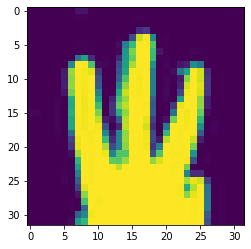

In [ ]:
plt.imshow(images[500])
print(labels[500])

In [ ]:
def generator_model(latent_dim):
 in_label = Input(shape=(1,))
 li = Embedding(5, 50)(in_label)
 li = Dense(8*8)(li)
 li = Reshape((8, 8, 1))(li)
 in_lat = Input(shape=(latent_dim,))
 n_nodes = 384 * 8 * 8
 gen = Dense(n_nodes)(in_lat)
 gen = Activation('relu')(gen)
 gen = Reshape((8, 8, 384))(gen)
 merge = Concatenate()([gen, li])
 gen = Conv2DTranspose(192, (5,5), strides=(2,2), padding='same')(merge)
 gen = BatchNormalization()(gen)
 gen = Activation('relu')(gen)
 gen = Conv2DTranspose(1, (5,5), strides=(2,2), padding='same')(gen)
 out_layer = Activation('tanh')(gen)
 model = Model([in_lat, in_label], out_layer)
 return model
 

latent_dim = 100
model = generator_model(latent_dim)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 24576)        2482176     ['input_2[0][0]']                
                                                                                                  
 embedding (Embedding)          (None, 1, 50)        250         ['input_1[0][0]']                
                                                                                              

In [ ]:
def discriminator_model(in_shape=(32,32,1)):


 in_image = Input(shape=in_shape)
 fe = Conv2D(32, (3,3), strides=(2,2), padding='same')(in_image)
 fe = LeakyReLU(alpha=0.2)(fe)
 fe = Dropout(0.5)(fe)

 fe = Conv2D(64, (3,3), padding='same')(fe)
 fe = BatchNormalization()(fe)
 fe = LeakyReLU(alpha=0.2)(fe)
 fe = Dropout(0.5)(fe)
 
 fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
 fe = BatchNormalization()(fe)
 fe = LeakyReLU(alpha=0.2)(fe)
 fe = Dropout(0.5)(fe)

 fe = Conv2D(256, (3,3), padding='same')(fe)
 fe = BatchNormalization()(fe)
 fe = LeakyReLU(alpha=0.2)(fe)
 fe = Dropout(0.5)(fe)

 fe = Flatten()(fe)
 out1 = Dense(1, activation='sigmoid')(fe)
 out2 = Dense(5, activation='softmax')(fe)
 model = Model(in_image, [out1, out2])

 opt = Adam(lr=0.0002, beta_1=0.5)
 model.compile(loss=['binary_crossentropy', 'sparse_categorical_crossentropy'], optimizer=opt)
 return model
 

model = discriminator_model()
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 16, 16, 32)   320         ['input_3[0][0]']                
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 16, 16, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 dropout (Dropout)              (None, 16, 16, 32)   0           ['leaky_re_lu[0][0]']            
                                                                                            

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:

def define_gan(g_model, d_model):

 for layer in d_model.layers:
    if not isinstance(layer, BatchNormalization):
      layer.trainable = False

 gan_output = d_model(g_model.output)

 model = Model(g_model.input, gan_output)

 opt = Adam(lr=0.0002, beta_1=0.5)
 model.compile(loss=['binary_crossentropy', 'sparse_categorical_crossentropy'], optimizer=opt)
 return model

In [ ]:
def generate_latent_points(latent_dim, n_samples):
 x_input = randn(latent_dim * n_samples)
 z_input = x_input.reshape(n_samples, latent_dim)
 labels = randint(0, 5, n_samples)
 return [z_input, labels]


def generate_fake_samples(generator, latent_dim, n_samples):
 z_input, labels_input = generate_latent_points(latent_dim, n_samples)
 images = generator.predict([z_input, labels_input])
 y = zeros((n_samples, 1))
 return [images, labels_input], y

def generate_real_samples(images, label, n_samples):
 ix = randint(0, images.shape[0], n_samples)
 X, labels = images[ix], label[ix]
 y = ones((n_samples, 1))
 return [X, labels], y



In [ ]:
def summarize_performance(step, g_model, latent_dim, n_samples=100):
 [X, _], _ = generate_fake_samples(g_model, latent_dim, n_samples)
 X = (X + 1) / 2.0
 for i in range(25):
    plt.subplot(5, 5, 1 + i)
    plt.axis('off')
    plt.imshow(X[i, :, :, 0], cmap='gray_r')
 plt.show()
 filename1 = 'generated_plot_%04d.png' % (step+1)
 plt.savefig(filename1)
 plt.close()
 filename2 = 'model_%04d.h5' % (step+1)
 g_model.save(filename2)
 print('>Saved: %s and %s' % (filename1, filename2))

In [ ]:
def train(g_model, d_model, gan_model, images,labels , latent_dim, n_epochs=100, n_batch=128):
 bat_per_epo = int(images.shape[0] / n_batch)
 n_steps = bat_per_epo * n_epochs
 half_batch = int(n_batch / 2)
 print(n_steps)

 gen_loss_bin = []
 gen_loss_class = []
 dis_loss_bin = []
 dis_loss_class = []
 gen_acc = []
 dis_acc = []



 for i in range(n_steps):
    [X_real, labels_real], y_real = generate_real_samples(images,labels, half_batch)
    _,d_r1,d_r2 = d_model.train_on_batch(X_real, [y_real, labels_real])

    [X_fake, labels_fake], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
    _,d_f1,d_f2 = d_model.train_on_batch(X_fake, [y_fake, labels_fake])

    [z_input, z_labels] = generate_latent_points(latent_dim, n_batch)
    y_gan = ones((n_batch, 1))
    _,g_1,g_2 = gan_model.train_on_batch([z_input, z_labels], [y_gan, z_labels])
    print('>%d, dr[%.3f,%.3f], df[%.3f,%.3f], g[%.3f,%.3f]' % (i+1, d_r1,d_r2, d_f1,d_f2, g_1,g_2))

    gen_loss_bin.append(g_1)
    gen_loss_class.append(g_2)
    dis_loss_bin.append(d_f1 + d_r1)
    dis_loss_class.append(d_f2 + d_r2)
    gen_acc.append( gan_model.evaluate([z_input, z_labels], [y_gan, z_labels] ,verbose=0))
    dis_acc.append((d_model.evaluate(X_real, [y_real, labels_real],verbose=0) + d_model.evaluate(X_fake, [y_fake, labels_fake] ,verbose=0)))
    if (i+1) % (bat_per_epo * 10) == 0:
      summarize_performance(i, g_model, latent_dim)
  
 plt.plot(gen_loss_bin)
 plt.show()
 plt.plot(gen_loss_class)
 plt.show()
 plt.plot(dis_loss_bin)
 plt.show()
 plt.plot(dis_loss_class)
 plt.show()

 return gen_acc, dis_acc

1400
2/2 [==============================] - 0s 6ms/step
>1, dr[0.737,2.096], df[1.773,2.615], g[0.557,2.300]
2/2 [==============================] - 0s 6ms/step
>2, dr[0.487,2.185], df[1.250,2.545], g[0.670,2.503]
2/2 [==============================] - 0s 5ms/step
>3, dr[0.528,2.219], df[1.133,2.454], g[1.069,2.404]
2/2 [==============================] - 0s 5ms/step
>4, dr[0.639,1.802], df[0.730,1.958], g[1.189,2.349]
2/2 [==============================] - 0s 5ms/step
>5, dr[0.685,2.105], df[0.601,2.382], g[1.397,2.416]
2/2 [==============================] - 0s 5ms/step
>6, dr[0.521,1.905], df[0.629,2.433], g[1.267,2.163]
2/2 [==============================] - 0s 5ms/step
>7, dr[0.704,1.940], df[0.530,2.497], g[1.148,2.096]
2/2 [==============================] - 0s 5ms/step
>8, dr[0.391,1.565], df[0.730,2.154], g[1.367,2.284]
2/2 [==============================] - 0s 5ms/step
>9, dr[0.310,1.512], df[0.705,1.923], g[1.558,2.633]
2/2 [==============================] - 0s 5ms/step
>10, dr[

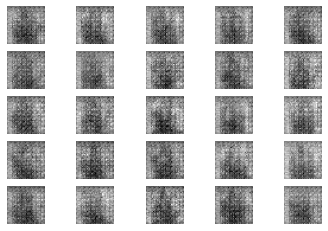

>Saved: generated_plot_0070.png and model_0070.h5
2/2 [==============================] - 0s 6ms/step
>71, dr[0.402,0.155], df[0.178,1.273], g[0.179,0.868]
2/2 [==============================] - 0s 6ms/step
>72, dr[0.278,0.324], df[0.183,1.093], g[0.166,0.846]
2/2 [==============================] - 0s 6ms/step
>73, dr[0.403,0.132], df[0.403,0.882], g[0.138,0.943]
2/2 [==============================] - 0s 6ms/step
>74, dr[0.218,0.135], df[0.251,1.029], g[0.099,0.803]
2/2 [==============================] - 0s 6ms/step
>75, dr[0.170,0.301], df[0.199,0.929], g[0.115,0.872]
2/2 [==============================] - 0s 6ms/step
>76, dr[0.234,0.384], df[0.194,1.201], g[0.116,0.850]
2/2 [==============================] - 0s 6ms/step
>77, dr[0.143,0.281], df[0.194,0.841], g[0.092,0.679]
2/2 [==============================] - 0s 6ms/step
>78, dr[0.122,0.212], df[0.141,0.896], g[0.111,0.796]
2/2 [==============================] - 0s 5ms/step
>79, dr[0.140,0.184], df[0.224,0.705], g[0.089,0.547]
2/2 [

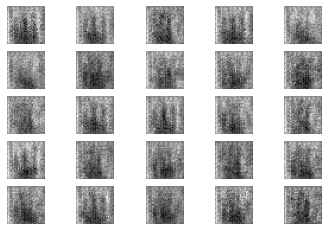

>Saved: generated_plot_0140.png and model_0140.h5
2/2 [==============================] - 0s 8ms/step
>141, dr[0.016,0.046], df[0.014,0.017], g[0.012,0.005]
2/2 [==============================] - 0s 7ms/step
>142, dr[0.017,0.093], df[0.008,0.017], g[0.010,0.024]
2/2 [==============================] - 0s 6ms/step
>143, dr[0.014,0.052], df[0.019,0.053], g[0.012,0.008]
2/2 [==============================] - 0s 7ms/step
>144, dr[0.032,0.154], df[0.011,0.037], g[0.017,0.009]
2/2 [==============================] - 0s 11ms/step
>145, dr[0.033,0.040], df[0.027,0.010], g[0.009,0.006]
2/2 [==============================] - 0s 5ms/step
>146, dr[0.022,0.036], df[0.041,0.028], g[0.006,0.012]
2/2 [==============================] - 0s 7ms/step
>147, dr[0.016,0.026], df[0.018,0.015], g[0.009,0.019]
2/2 [==============================] - 0s 8ms/step
>148, dr[0.021,0.059], df[0.010,0.022], g[0.012,0.011]
2/2 [==============================] - 0s 6ms/step
>149, dr[0.021,0.038], df[0.044,0.026], g[0.011,0.

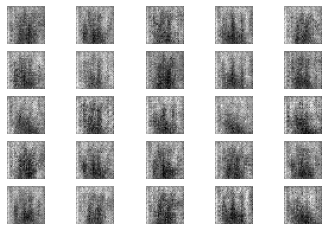

>Saved: generated_plot_0210.png and model_0210.h5
2/2 [==============================] - 0s 7ms/step
>211, dr[0.018,0.076], df[0.012,0.002], g[0.008,0.005]
2/2 [==============================] - 0s 8ms/step
>212, dr[0.011,0.090], df[0.040,0.004], g[0.007,0.003]
2/2 [==============================] - 0s 8ms/step
>213, dr[0.060,0.075], df[0.028,0.001], g[0.011,0.011]
2/2 [==============================] - 0s 7ms/step
>214, dr[0.019,0.017], df[0.019,0.010], g[0.005,0.009]
2/2 [==============================] - 0s 7ms/step
>215, dr[0.025,0.090], df[0.013,0.004], g[0.008,0.008]
2/2 [==============================] - 0s 8ms/step
>216, dr[0.012,0.079], df[0.017,0.011], g[0.009,0.005]
2/2 [==============================] - 0s 4ms/step
>217, dr[0.009,0.077], df[0.017,0.005], g[0.008,0.004]
2/2 [==============================] - 0s 7ms/step
>218, dr[0.019,0.075], df[0.004,0.009], g[0.007,0.005]
2/2 [==============================] - 0s 4ms/step
>219, dr[0.008,0.106], df[0.010,0.007], g[0.005,0.0

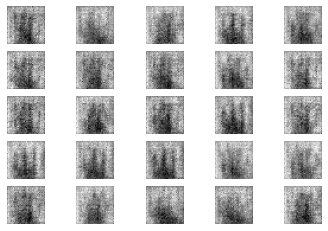

>Saved: generated_plot_0280.png and model_0280.h5
2/2 [==============================] - 0s 7ms/step
>281, dr[0.029,0.028], df[0.009,0.003], g[0.015,0.006]
2/2 [==============================] - 0s 9ms/step
>282, dr[0.007,0.066], df[0.014,0.003], g[0.012,0.003]
2/2 [==============================] - 0s 6ms/step
>283, dr[0.006,0.018], df[0.005,0.007], g[0.015,0.010]
2/2 [==============================] - 0s 5ms/step
>284, dr[0.016,0.083], df[0.009,0.003], g[0.014,0.003]
2/2 [==============================] - 0s 6ms/step
>285, dr[0.015,0.026], df[0.006,0.005], g[0.009,0.011]
2/2 [==============================] - 0s 6ms/step
>286, dr[0.008,0.013], df[0.010,0.009], g[0.009,0.007]
2/2 [==============================] - 0s 9ms/step
>287, dr[0.013,0.013], df[0.007,0.007], g[0.013,0.005]
2/2 [==============================] - 0s 8ms/step
>288, dr[0.012,0.048], df[0.007,0.009], g[0.010,0.005]
2/2 [==============================] - 0s 4ms/step
>289, dr[0.008,0.005], df[0.008,0.002], g[0.006,0.0

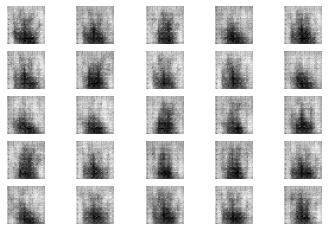

>Saved: generated_plot_0350.png and model_0350.h5
2/2 [==============================] - 0s 8ms/step
>351, dr[0.168,0.010], df[0.215,0.018], g[0.387,0.053]
2/2 [==============================] - 0s 9ms/step
>352, dr[0.151,0.132], df[0.073,0.017], g[0.050,0.054]
2/2 [==============================] - 0s 10ms/step
>353, dr[0.078,0.092], df[0.101,0.036], g[0.144,0.062]
2/2 [==============================] - 0s 9ms/step
>354, dr[0.069,0.078], df[0.006,0.037], g[0.104,0.048]
2/2 [==============================] - 0s 9ms/step
>355, dr[0.102,0.039], df[0.315,0.027], g[1.719,0.034]
2/2 [==============================] - 0s 9ms/step
>356, dr[0.479,0.145], df[0.765,0.022], g[2.810,0.102]
2/2 [==============================] - 0s 5ms/step
>357, dr[0.839,0.056], df[0.496,0.098], g[0.485,0.142]
2/2 [==============================] - 0s 6ms/step
>358, dr[0.018,0.045], df[0.101,0.084], g[1.056,0.097]
2/2 [==============================] - 0s 9ms/step
>359, dr[0.103,0.204], df[0.169,0.077], g[0.988,0.

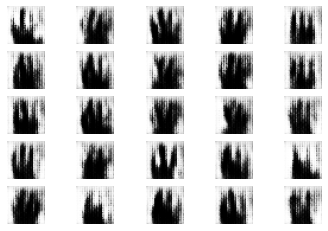

>Saved: generated_plot_0420.png and model_0420.h5
2/2 [==============================] - 0s 10ms/step
>421, dr[0.189,0.026], df[0.364,0.023], g[0.633,0.055]
2/2 [==============================] - 0s 11ms/step
>422, dr[0.245,0.018], df[0.347,0.026], g[0.847,0.087]
2/2 [==============================] - 0s 6ms/step
>423, dr[0.456,0.010], df[0.239,0.016], g[0.729,0.076]
2/2 [==============================] - 0s 7ms/step
>424, dr[0.250,0.018], df[0.459,0.010], g[1.000,0.036]
2/2 [==============================] - 0s 5ms/step
>425, dr[0.360,0.014], df[0.346,0.031], g[1.000,0.029]
2/2 [==============================] - 0s 9ms/step
>426, dr[0.453,0.097], df[0.696,0.004], g[1.236,0.030]
2/2 [==============================] - 0s 10ms/step
>427, dr[0.663,0.039], df[0.506,0.007], g[1.141,0.059]
2/2 [==============================] - 0s 4ms/step
>428, dr[0.596,0.011], df[0.928,0.103], g[1.844,0.111]
2/2 [==============================] - 0s 6ms/step
>429, dr[0.960,0.066], df[0.581,0.019], g[1.116,

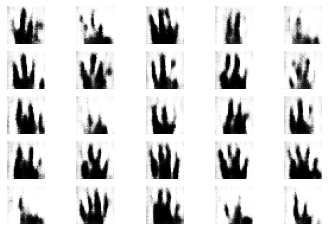

>Saved: generated_plot_0490.png and model_0490.h5
2/2 [==============================] - 0s 8ms/step
>491, dr[0.697,0.050], df[0.946,0.050], g[1.704,0.028]
2/2 [==============================] - 0s 7ms/step
>492, dr[0.838,0.010], df[0.808,0.084], g[1.762,0.026]
2/2 [==============================] - 0s 9ms/step
>493, dr[0.729,0.088], df[0.684,0.040], g[1.486,0.031]
2/2 [==============================] - 0s 5ms/step
>494, dr[0.938,0.015], df[0.767,0.013], g[1.492,0.020]
2/2 [==============================] - 0s 11ms/step
>495, dr[0.988,0.006], df[1.348,0.050], g[1.385,0.011]
2/2 [==============================] - 0s 6ms/step
>496, dr[0.925,0.020], df[0.986,0.038], g[1.573,0.095]
2/2 [==============================] - 0s 11ms/step
>497, dr[0.875,0.006], df[0.635,0.018], g[1.584,0.122]
2/2 [==============================] - 0s 6ms/step
>498, dr[0.779,0.079], df[0.869,0.011], g[1.342,0.018]
2/2 [==============================] - 0s 4ms/step
>499, dr[0.810,0.020], df[0.773,0.087], g[1.412,0

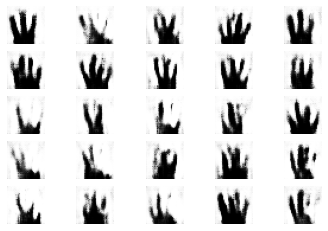

>Saved: generated_plot_0560.png and model_0560.h5
2/2 [==============================] - 0s 6ms/step
>561, dr[0.722,0.008], df[0.944,0.048], g[1.280,0.039]
2/2 [==============================] - 0s 10ms/step
>562, dr[1.075,0.012], df[0.929,0.064], g[1.298,0.051]
2/2 [==============================] - 0s 11ms/step
>563, dr[0.627,0.014], df[0.612,0.072], g[1.440,0.028]
2/2 [==============================] - 0s 10ms/step
>564, dr[0.712,0.013], df[0.762,0.038], g[1.387,0.053]
2/2 [==============================] - 0s 11ms/step
>565, dr[0.793,0.017], df[0.850,0.099], g[1.269,0.076]
2/2 [==============================] - 0s 13ms/step
>566, dr[0.939,0.028], df[0.861,0.019], g[1.349,0.123]
2/2 [==============================] - 0s 11ms/step
>567, dr[0.952,0.042], df[0.846,0.073], g[1.175,0.047]
2/2 [==============================] - 0s 10ms/step
>568, dr[0.877,0.139], df[0.888,0.007], g[1.290,0.072]
2/2 [==============================] - 0s 6ms/step
>569, dr[0.688,0.017], df[0.729,0.006], g[1.

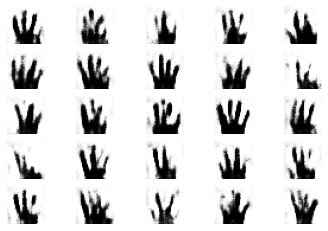

>Saved: generated_plot_0630.png and model_0630.h5
2/2 [==============================] - 0s 13ms/step
>631, dr[0.884,0.024], df[0.806,0.055], g[1.154,0.072]
2/2 [==============================] - 0s 6ms/step
>632, dr[0.826,0.010], df[0.881,0.063], g[1.287,0.063]
2/2 [==============================] - 0s 11ms/step
>633, dr[0.857,0.004], df[0.842,0.008], g[1.114,0.041]
2/2 [==============================] - 0s 11ms/step
>634, dr[0.825,0.040], df[0.853,0.037], g[0.964,0.023]
2/2 [==============================] - 0s 11ms/step
>635, dr[0.736,0.025], df[0.855,0.127], g[1.169,0.055]
2/2 [==============================] - 0s 12ms/step
>636, dr[0.727,0.010], df[0.797,0.036], g[1.406,0.018]
2/2 [==============================] - 0s 11ms/step
>637, dr[1.026,0.007], df[0.855,0.039], g[1.124,0.022]
2/2 [==============================] - 0s 6ms/step
>638, dr[0.632,0.032], df[0.738,0.013], g[1.260,0.038]
2/2 [==============================] - 0s 9ms/step
>639, dr[0.763,0.015], df[0.780,0.075], g[1.2

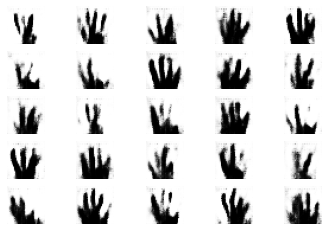

>Saved: generated_plot_0700.png and model_0700.h5
2/2 [==============================] - 0s 12ms/step
>701, dr[0.788,0.038], df[0.800,0.079], g[1.083,0.041]
2/2 [==============================] - 0s 12ms/step
>702, dr[0.662,0.004], df[0.772,0.021], g[1.192,0.006]
2/2 [==============================] - 0s 6ms/step
>703, dr[0.684,0.004], df[0.886,0.038], g[1.405,0.070]
2/2 [==============================] - 0s 10ms/step
>704, dr[0.765,0.011], df[0.586,0.045], g[1.477,0.012]
2/2 [==============================] - 0s 12ms/step
>705, dr[0.841,0.011], df[0.885,0.011], g[1.195,0.048]
2/2 [==============================] - 0s 11ms/step
>706, dr[0.758,0.022], df[0.777,0.078], g[1.318,0.040]
2/2 [==============================] - 0s 5ms/step
>707, dr[0.839,0.009], df[0.749,0.018], g[1.314,0.030]
2/2 [==============================] - 0s 10ms/step
>708, dr[0.863,0.004], df[0.708,0.011], g[1.103,0.051]
2/2 [==============================] - 0s 8ms/step
>709, dr[0.538,0.022], df[0.831,0.054], g[1.1

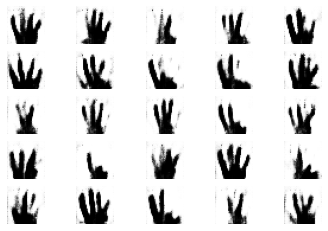

>Saved: generated_plot_0770.png and model_0770.h5
2/2 [==============================] - 0s 12ms/step
>771, dr[0.761,0.007], df[0.709,0.019], g[1.364,0.025]
2/2 [==============================] - 0s 6ms/step
>772, dr[0.628,0.031], df[0.630,0.014], g[1.418,0.035]
2/2 [==============================] - 0s 7ms/step
>773, dr[0.920,0.009], df[0.638,0.033], g[1.067,0.037]
2/2 [==============================] - 0s 11ms/step
>774, dr[0.654,0.002], df[0.846,0.030], g[1.300,0.023]
2/2 [==============================] - 0s 12ms/step
>775, dr[0.672,0.009], df[0.709,0.034], g[1.338,0.027]
2/2 [==============================] - 0s 4ms/step
>776, dr[0.669,0.022], df[0.685,0.002], g[1.199,0.075]
2/2 [==============================] - 0s 12ms/step
>777, dr[0.783,0.005], df[0.826,0.016], g[1.196,0.011]
2/2 [==============================] - 0s 8ms/step
>778, dr[0.814,0.006], df[0.705,0.009], g[1.229,0.069]
2/2 [==============================] - 0s 9ms/step
>779, dr[0.725,0.015], df[0.734,0.004], g[1.229

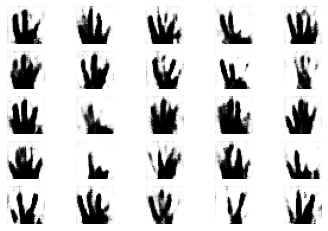

>Saved: generated_plot_0840.png and model_0840.h5
2/2 [==============================] - 0s 6ms/step
>841, dr[0.710,0.004], df[0.764,0.001], g[1.228,0.008]
2/2 [==============================] - 0s 12ms/step
>842, dr[0.721,0.008], df[0.744,0.003], g[1.274,0.012]
2/2 [==============================] - 0s 11ms/step
>843, dr[0.716,0.010], df[0.609,0.002], g[1.209,0.045]
2/2 [==============================] - 0s 5ms/step
>844, dr[0.500,0.004], df[0.749,0.005], g[1.223,0.003]
2/2 [==============================] - 0s 11ms/step
>845, dr[0.668,0.002], df[0.622,0.059], g[1.349,0.036]
2/2 [==============================] - 0s 13ms/step
>846, dr[0.690,0.010], df[0.678,0.060], g[1.355,0.009]
2/2 [==============================] - 0s 10ms/step
>847, dr[0.688,0.006], df[0.746,0.051], g[1.298,0.035]
2/2 [==============================] - 0s 6ms/step
>848, dr[0.717,0.019], df[0.697,0.079], g[1.287,0.049]
2/2 [==============================] - 0s 9ms/step
>849, dr[0.901,0.007], df[0.744,0.007], g[1.15

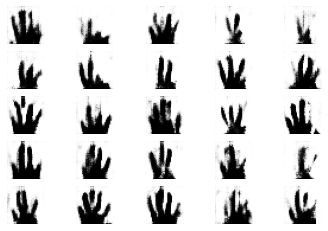

>Saved: generated_plot_0910.png and model_0910.h5
2/2 [==============================] - 0s 6ms/step
>911, dr[0.680,0.004], df[0.723,0.021], g[1.290,0.035]
2/2 [==============================] - 0s 15ms/step
>912, dr[0.701,0.006], df[0.697,0.004], g[1.202,0.060]
2/2 [==============================] - 0s 5ms/step
>913, dr[0.704,0.015], df[0.784,0.012], g[1.340,0.004]
2/2 [==============================] - 0s 6ms/step
>914, dr[0.788,0.005], df[0.604,0.004], g[1.248,0.008]
2/2 [==============================] - 0s 4ms/step
>915, dr[0.614,0.003], df[0.655,0.074], g[1.322,0.007]
2/2 [==============================] - 0s 9ms/step
>916, dr[0.728,0.007], df[0.647,0.029], g[1.251,0.031]
2/2 [==============================] - 0s 12ms/step
>917, dr[0.815,0.002], df[0.779,0.004], g[1.155,0.018]
2/2 [==============================] - 0s 4ms/step
>918, dr[0.644,0.004], df[0.788,0.055], g[1.298,0.007]
2/2 [==============================] - 0s 5ms/step
>919, dr[0.747,0.003], df[0.634,0.004], g[1.266,0

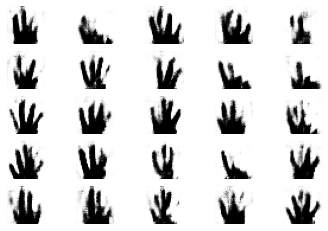

>Saved: generated_plot_0980.png and model_0980.h5
2/2 [==============================] - 0s 15ms/step
>981, dr[0.650,0.015], df[0.635,0.018], g[1.194,0.014]
2/2 [==============================] - 0s 13ms/step
>982, dr[0.710,0.021], df[0.731,0.042], g[1.170,0.012]
2/2 [==============================] - 0s 5ms/step
>983, dr[0.621,0.017], df[0.672,0.005], g[1.256,0.035]
2/2 [==============================] - 0s 9ms/step
>984, dr[0.623,0.004], df[0.653,0.002], g[1.358,0.017]
2/2 [==============================] - 0s 9ms/step
>985, dr[0.750,0.008], df[0.639,0.034], g[1.318,0.002]
2/2 [==============================] - 0s 6ms/step
>986, dr[0.709,0.001], df[0.681,0.029], g[1.154,0.038]
2/2 [==============================] - 0s 13ms/step
>987, dr[0.525,0.008], df[0.573,0.003], g[1.174,0.029]
2/2 [==============================] - 0s 4ms/step
>988, dr[0.749,0.005], df[0.690,0.019], g[1.256,0.029]
2/2 [==============================] - 0s 12ms/step
>989, dr[0.619,0.011], df[0.797,0.042], g[1.227

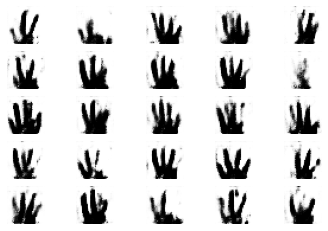

>Saved: generated_plot_1050.png and model_1050.h5
2/2 [==============================] - 0s 6ms/step
>1051, dr[0.620,0.005], df[0.682,0.026], g[1.362,0.010]
2/2 [==============================] - 0s 5ms/step
>1052, dr[0.615,0.009], df[0.605,0.010], g[1.265,0.010]
2/2 [==============================] - 0s 11ms/step
>1053, dr[0.548,0.012], df[0.645,0.010], g[1.286,0.039]
2/2 [==============================] - 0s 10ms/step
>1054, dr[0.746,0.007], df[0.623,0.017], g[1.094,0.022]
2/2 [==============================] - 0s 10ms/step
>1055, dr[0.814,0.006], df[0.603,0.018], g[1.167,0.037]
2/2 [==============================] - 0s 14ms/step
>1056, dr[0.668,0.025], df[0.666,0.021], g[1.035,0.026]
2/2 [==============================] - 0s 7ms/step
>1057, dr[0.534,0.004], df[0.718,0.009], g[1.259,0.015]
2/2 [==============================] - 0s 14ms/step
>1058, dr[0.529,0.004], df[0.603,0.006], g[1.323,0.017]
2/2 [==============================] - 0s 4ms/step
>1059, dr[0.636,0.003], df[0.571,0.004

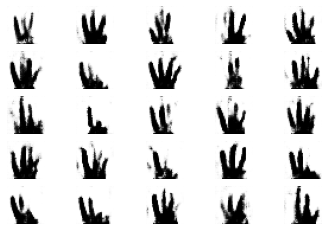

>Saved: generated_plot_1120.png and model_1120.h5
2/2 [==============================] - 0s 11ms/step
>1121, dr[0.601,0.001], df[0.655,0.049], g[1.207,0.021]
2/2 [==============================] - 0s 5ms/step
>1122, dr[0.629,0.005], df[0.510,0.001], g[1.058,0.009]
2/2 [==============================] - 0s 9ms/step
>1123, dr[0.563,0.005], df[0.826,0.046], g[1.360,0.011]
2/2 [==============================] - 0s 4ms/step
>1124, dr[0.635,0.003], df[0.659,0.005], g[1.217,0.019]
2/2 [==============================] - 0s 14ms/step
>1125, dr[0.626,0.011], df[0.602,0.002], g[1.241,0.016]
2/2 [==============================] - 0s 13ms/step
>1126, dr[0.667,0.003], df[0.673,0.055], g[1.314,0.017]
2/2 [==============================] - 0s 5ms/step
>1127, dr[0.448,0.003], df[0.537,0.024], g[1.238,0.011]
2/2 [==============================] - 0s 16ms/step
>1128, dr[0.551,0.003], df[0.638,0.007], g[1.272,0.005]
2/2 [==============================] - 0s 13ms/step
>1129, dr[0.731,0.007], df[0.706,0.013

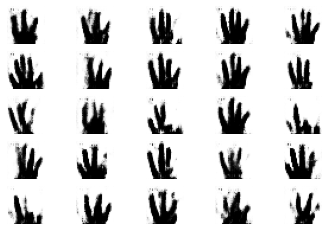

>Saved: generated_plot_1190.png and model_1190.h5
2/2 [==============================] - 0s 8ms/step
>1191, dr[0.568,0.020], df[0.632,0.084], g[1.182,0.011]
2/2 [==============================] - 0s 7ms/step
>1192, dr[0.514,0.005], df[0.626,0.008], g[1.153,0.020]
2/2 [==============================] - 0s 5ms/step
>1193, dr[0.660,0.004], df[0.532,0.003], g[1.068,0.043]
2/2 [==============================] - 0s 5ms/step
>1194, dr[0.545,0.002], df[0.751,0.033], g[1.325,0.003]
2/2 [==============================] - 0s 12ms/step
>1195, dr[0.674,0.005], df[0.631,0.044], g[1.311,0.021]
2/2 [==============================] - 0s 10ms/step
>1196, dr[0.697,0.025], df[0.550,0.006], g[1.230,0.016]
2/2 [==============================] - 0s 10ms/step
>1197, dr[0.540,0.024], df[0.581,0.003], g[1.186,0.038]
2/2 [==============================] - 0s 5ms/step
>1198, dr[0.563,0.015], df[0.589,0.007], g[1.190,0.046]
2/2 [==============================] - 0s 6ms/step
>1199, dr[0.629,0.019], df[0.590,0.006],

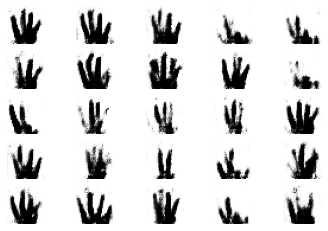

>Saved: generated_plot_1260.png and model_1260.h5
2/2 [==============================] - 0s 12ms/step
>1261, dr[0.714,0.021], df[0.701,0.005], g[1.254,0.015]
2/2 [==============================] - 0s 10ms/step
>1262, dr[0.636,0.010], df[0.614,0.011], g[1.296,0.035]
2/2 [==============================] - 0s 13ms/step
>1263, dr[0.569,0.003], df[0.767,0.010], g[1.178,0.002]
2/2 [==============================] - 0s 11ms/step
>1264, dr[0.591,0.001], df[0.543,0.034], g[1.290,0.007]
2/2 [==============================] - 0s 11ms/step
>1265, dr[0.567,0.035], df[0.583,0.022], g[1.183,0.045]
2/2 [==============================] - 0s 15ms/step
>1266, dr[0.453,0.002], df[0.590,0.030], g[1.214,0.054]
2/2 [==============================] - 0s 8ms/step
>1267, dr[0.650,0.025], df[0.588,0.014], g[1.355,0.036]
2/2 [==============================] - 0s 13ms/step
>1268, dr[0.703,0.016], df[0.627,0.028], g[1.104,0.010]
2/2 [==============================] - 0s 6ms/step
>1269, dr[0.686,0.009], df[0.748,0.0

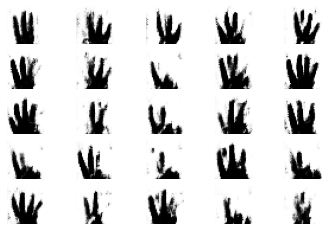

>Saved: generated_plot_1330.png and model_1330.h5
2/2 [==============================] - 0s 13ms/step
>1331, dr[0.627,0.010], df[0.631,0.002], g[1.156,0.007]
2/2 [==============================] - 0s 13ms/step
>1332, dr[0.594,0.033], df[0.595,0.085], g[1.209,0.049]
2/2 [==============================] - 0s 11ms/step
>1333, dr[0.607,0.002], df[0.747,0.024], g[1.321,0.032]
2/2 [==============================] - 0s 5ms/step
>1334, dr[0.505,0.002], df[0.514,0.019], g[1.232,0.008]
2/2 [==============================] - 0s 6ms/step
>1335, dr[0.566,0.002], df[0.706,0.049], g[1.282,0.003]
2/2 [==============================] - 0s 6ms/step
>1336, dr[0.513,0.001], df[0.513,0.088], g[1.281,0.026]
2/2 [==============================] - 0s 11ms/step
>1337, dr[0.719,0.014], df[0.527,0.005], g[1.281,0.035]
2/2 [==============================] - 0s 5ms/step
>1338, dr[0.560,0.008], df[0.728,0.003], g[1.194,0.011]
2/2 [==============================] - 0s 12ms/step
>1339, dr[0.477,0.002], df[0.518,0.018

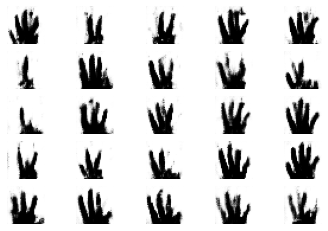

>Saved: generated_plot_1400.png and model_1400.h5


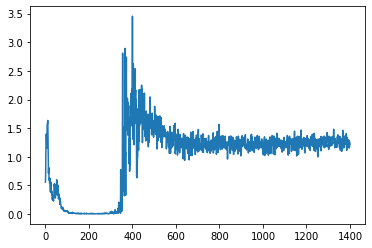

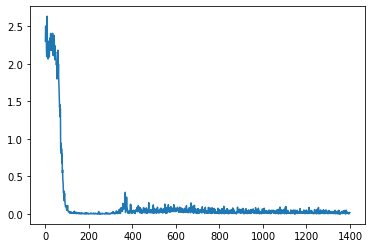

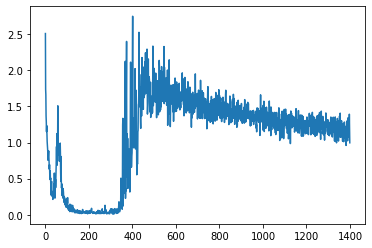

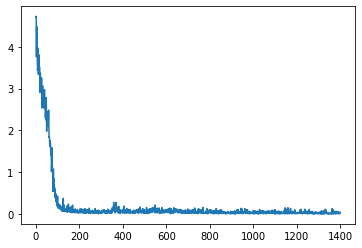

In [ ]:

latent_dim = 100

discriminator = discriminator_model()
generator = generator_model(latent_dim)
gan_model = define_gan(generator, discriminator)

gen_acc, dis_acc = train(generator, discriminator, gan_model, images,labels, latent_dim,n_epochs=150)

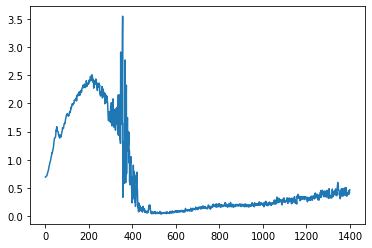

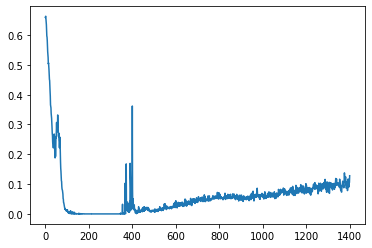

In [ ]:
plt.plot([i[1] for i in gen_acc])
plt.show()
plt.plot([i[1] for i in dis_acc])
plt.show()

1/1 [==============================] - 0s 15ms/step


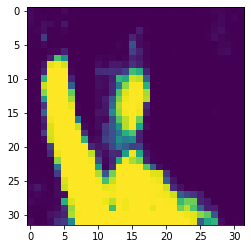

1/1 [==============================] - 0s 15ms/step


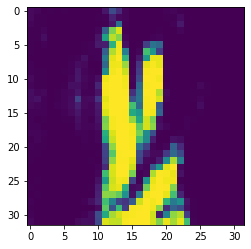

1/1 [==============================] - 0s 17ms/step


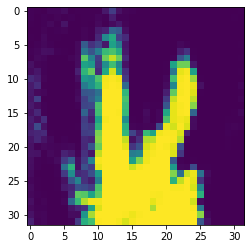

1/1 [==============================] - 0s 15ms/step


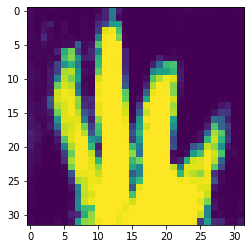

1/1 [==============================] - 0s 17ms/step


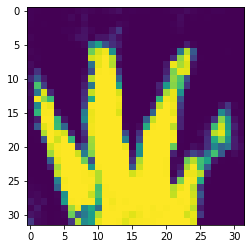

In [ ]:
def generate_by_class(generator, latent_dim, clas):
 z_input = randn(latent_dim)
 z_input = z_input.reshape(1, latent_dim)
 image = generator.predict([z_input, np.asarray([clas])])
 plt.imshow(image[0, :, :, 0])
 plt.show()

for i in range(0,5):
  generate_by_class(generator, latent_dim,i)

#Wasserstein


In [ ]:
import keras.backend as K

def wasserstein_loss( y_true, y_pred):
        y_true = float(y_true)
        y_pred = float(y_pred)
        return K.mean(y_true * y_pred)

In [ ]:
def discriminator_model_Wes(in_shape=(32,32,1)):


 in_image = Input(shape=in_shape)
 fe = Conv2D(32, (3,3), strides=(2,2), padding='same')(in_image)
 fe = LeakyReLU(alpha=0.2)(fe)
 fe = Dropout(0.5)(fe)

 fe = Conv2D(64, (3,3), padding='same')(fe)
 fe = BatchNormalization()(fe)
 fe = LeakyReLU(alpha=0.2)(fe)
 fe = Dropout(0.5)(fe)
 
 fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
 fe = BatchNormalization()(fe)
 fe = LeakyReLU(alpha=0.2)(fe)
 fe = Dropout(0.5)(fe)

 fe = Conv2D(256, (3,3), padding='same')(fe)
 fe = BatchNormalization()(fe)
 fe = LeakyReLU(alpha=0.2)(fe)
 fe = Dropout(0.5)(fe)

 fe = Flatten()(fe)
 out1 = Dense(1, activation='sigmoid')(fe)
 out2 = Dense(5, activation='softmax')(fe)
 model = Model(in_image, [out1, out2])

 opt = Adam(lr=0.0002, beta_1=0.5)
 model.compile(loss= ['binary_crossentropy', wasserstein_loss], optimizer=opt)
 return model

In [ ]:
def define_wgan(g_model, d_model):

 for layer in d_model.layers:
    if not isinstance(layer, BatchNormalization):
      layer.trainable = False

 gan_output = d_model(g_model.output)

 model = Model(g_model.input, gan_output)

 opt = Adam(lr=0.0002, beta_1=0.5)
 model.compile(loss=['binary_crossentropy', wasserstein_loss], optimizer=opt)
 return model

1400
2/2 [==============================] - 0s 6ms/step
>1, dr[0.530,0.406], df[2.303,0.400], g[0.481,0.403]
2/2 [==============================] - 0s 6ms/step
>2, dr[0.244,0.350], df[1.606,0.344], g[0.827,0.455]
2/2 [==============================] - 0s 7ms/step
>3, dr[0.445,0.409], df[1.030,0.375], g[1.247,0.373]
2/2 [==============================] - 0s 5ms/step
>4, dr[0.666,0.375], df[0.640,0.369], g[1.457,0.405]
2/2 [==============================] - 0s 6ms/step
>5, dr[0.585,0.378], df[0.528,0.394], g[1.461,0.412]
2/2 [==============================] - 0s 6ms/step
>6, dr[0.401,0.447], df[0.749,0.400], g[1.339,0.409]
2/2 [==============================] - 0s 5ms/step
>7, dr[0.329,0.478], df[0.624,0.406], g[1.474,0.398]
2/2 [==============================] - 0s 6ms/step
>8, dr[0.406,0.447], df[0.482,0.441], g[1.507,0.387]
2/2 [==============================] - 0s 5ms/step
>9, dr[0.509,0.356], df[0.586,0.363], g[1.500,0.367]
2/2 [==============================] - 0s 5ms/step
>10, dr[

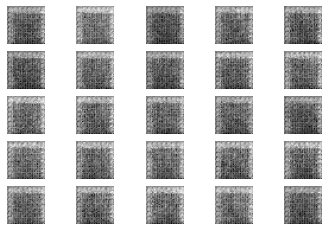

>Saved: generated_plot_0070.png and model_0070.h5
2/2 [==============================] - 0s 6ms/step
>71, dr[0.013,0.391], df[0.009,0.394], g[0.007,0.402]
2/2 [==============================] - 0s 6ms/step
>72, dr[0.021,0.400], df[0.015,0.400], g[0.007,0.394]
2/2 [==============================] - 0s 6ms/step
>73, dr[0.015,0.416], df[0.010,0.425], g[0.004,0.392]
2/2 [==============================] - 0s 6ms/step
>74, dr[0.014,0.369], df[0.033,0.450], g[0.008,0.391]
2/2 [==============================] - 0s 6ms/step
>75, dr[0.014,0.363], df[0.011,0.409], g[0.010,0.430]
2/2 [==============================] - 0s 6ms/step
>76, dr[0.018,0.466], df[0.015,0.366], g[0.006,0.420]
2/2 [==============================] - 0s 6ms/step
>77, dr[0.013,0.359], df[0.009,0.425], g[0.006,0.422]
2/2 [==============================] - 0s 7ms/step
>78, dr[0.015,0.363], df[0.013,0.391], g[0.006,0.412]
2/2 [==============================] - 0s 6ms/step
>79, dr[0.026,0.372], df[0.006,0.412], g[0.004,0.408]
2/2 [

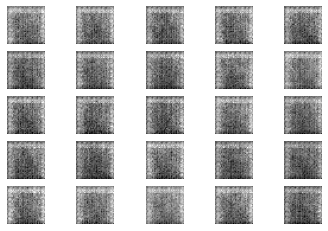

>Saved: generated_plot_0140.png and model_0140.h5
2/2 [==============================] - 0s 8ms/step
>141, dr[0.016,0.381], df[0.007,0.381], g[0.002,0.436]
2/2 [==============================] - 0s 5ms/step
>142, dr[0.006,0.441], df[0.006,0.381], g[0.001,0.363]
2/2 [==============================] - 0s 6ms/step
>143, dr[0.007,0.359], df[0.007,0.369], g[0.004,0.377]
2/2 [==============================] - 0s 8ms/step
>144, dr[0.004,0.381], df[0.014,0.447], g[0.005,0.373]
2/2 [==============================] - 0s 7ms/step
>145, dr[0.014,0.353], df[0.005,0.384], g[0.004,0.402]
2/2 [==============================] - 0s 6ms/step
>146, dr[0.003,0.391], df[0.005,0.400], g[0.003,0.359]
2/2 [==============================] - 0s 8ms/step
>147, dr[0.011,0.344], df[0.011,0.369], g[0.003,0.402]
2/2 [==============================] - 0s 7ms/step
>148, dr[0.016,0.441], df[0.007,0.403], g[0.003,0.453]
2/2 [==============================] - 0s 7ms/step
>149, dr[0.012,0.450], df[0.008,0.394], g[0.002,0.4

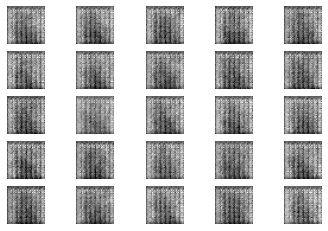

>Saved: generated_plot_0210.png and model_0210.h5
2/2 [==============================] - 0s 8ms/step
>211, dr[0.036,0.438], df[0.007,0.400], g[0.005,0.356]
2/2 [==============================] - 0s 6ms/step
>212, dr[0.001,0.359], df[0.036,0.363], g[0.007,0.416]
2/2 [==============================] - 0s 11ms/step
>213, dr[0.008,0.381], df[0.004,0.444], g[0.010,0.417]
2/2 [==============================] - 0s 7ms/step
>214, dr[0.012,0.412], df[0.003,0.428], g[0.009,0.372]
2/2 [==============================] - 0s 10ms/step
>215, dr[0.005,0.366], df[0.004,0.366], g[0.006,0.444]
2/2 [==============================] - 0s 5ms/step
>216, dr[0.008,0.434], df[0.020,0.438], g[0.016,0.416]
2/2 [==============================] - 0s 9ms/step
>217, dr[0.005,0.425], df[0.008,0.428], g[0.007,0.397]
2/2 [==============================] - 0s 6ms/step
>218, dr[0.004,0.350], df[0.016,0.428], g[0.034,0.359]
2/2 [==============================] - 0s 5ms/step
>219, dr[0.021,0.381], df[0.033,0.381], g[0.018,0

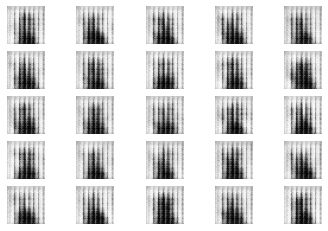

>Saved: generated_plot_0280.png and model_0280.h5
2/2 [==============================] - 0s 5ms/step
>281, dr[0.047,0.381], df[0.076,0.397], g[0.195,0.389]
2/2 [==============================] - 0s 4ms/step
>282, dr[0.084,0.466], df[0.064,0.391], g[0.176,0.391]
2/2 [==============================] - 0s 5ms/step
>283, dr[0.089,0.366], df[0.073,0.384], g[0.363,0.406]
2/2 [==============================] - 0s 9ms/step
>284, dr[0.052,0.431], df[0.102,0.406], g[0.464,0.436]
2/2 [==============================] - 0s 4ms/step
>285, dr[0.228,0.375], df[0.032,0.469], g[0.156,0.425]
2/2 [==============================] - 0s 5ms/step
>286, dr[0.066,0.369], df[0.162,0.363], g[0.293,0.397]
2/2 [==============================] - 0s 10ms/step
>287, dr[0.044,0.369], df[0.078,0.453], g[0.485,0.355]
2/2 [==============================] - 0s 9ms/step
>288, dr[0.115,0.431], df[0.050,0.434], g[0.517,0.419]
2/2 [==============================] - 0s 9ms/step
>289, dr[0.061,0.347], df[0.128,0.438], g[0.388,0.

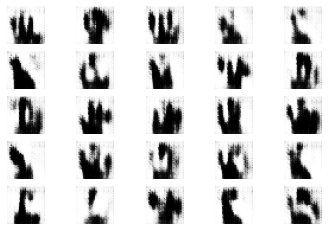

>Saved: generated_plot_0350.png and model_0350.h5
2/2 [==============================] - 0s 10ms/step
>351, dr[1.115,0.409], df[1.530,0.422], g[2.374,0.381]
2/2 [==============================] - 0s 9ms/step
>352, dr[1.036,0.412], df[1.216,0.384], g[2.339,0.400]
2/2 [==============================] - 0s 7ms/step
>353, dr[1.165,0.438], df[1.469,0.362], g[2.283,0.428]
2/2 [==============================] - 0s 12ms/step
>354, dr[1.366,0.406], df[0.770,0.353], g[1.363,0.364]
2/2 [==============================] - 0s 10ms/step
>355, dr[0.662,0.437], df[0.884,0.403], g[1.950,0.391]
2/2 [==============================] - 0s 10ms/step
>356, dr[0.663,0.406], df[0.735,0.363], g[2.311,0.405]
2/2 [==============================] - 0s 5ms/step
>357, dr[0.868,0.397], df[0.733,0.334], g[2.084,0.403]
2/2 [==============================] - 0s 9ms/step
>358, dr[0.947,0.447], df[1.001,0.375], g[2.586,0.400]
2/2 [==============================] - 0s 5ms/step
>359, dr[0.911,0.469], df[0.679,0.378], g[2.475

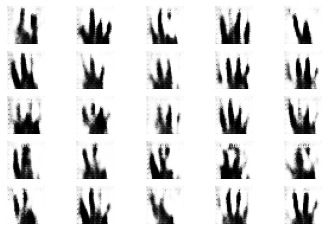

>Saved: generated_plot_0420.png and model_0420.h5
2/2 [==============================] - 0s 9ms/step
>421, dr[0.611,0.447], df[0.783,0.381], g[1.108,0.420]
2/2 [==============================] - 0s 10ms/step
>422, dr[0.990,0.319], df[0.776,0.397], g[0.890,0.386]
2/2 [==============================] - 0s 6ms/step
>423, dr[0.927,0.347], df[1.144,0.438], g[0.812,0.392]
2/2 [==============================] - 0s 6ms/step
>424, dr[0.806,0.431], df[0.992,0.428], g[1.073,0.405]
2/2 [==============================] - 0s 10ms/step
>425, dr[0.906,0.394], df[0.830,0.387], g[1.008,0.444]
2/2 [==============================] - 0s 10ms/step
>426, dr[1.162,0.353], df[1.167,0.434], g[1.005,0.402]
2/2 [==============================] - 0s 5ms/step
>427, dr[0.908,0.453], df[0.838,0.369], g[0.971,0.383]
2/2 [==============================] - 0s 6ms/step
>428, dr[0.782,0.441], df[0.689,0.397], g[0.886,0.355]
2/2 [==============================] - 0s 10ms/step
>429, dr[0.987,0.316], df[1.126,0.412], g[0.884

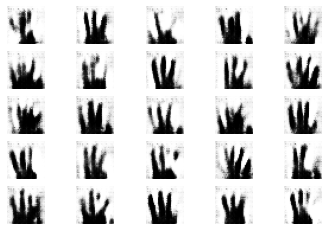

>Saved: generated_plot_0490.png and model_0490.h5
2/2 [==============================] - 0s 5ms/step
>491, dr[0.963,0.387], df[0.746,0.341], g[1.355,0.420]
2/2 [==============================] - 0s 6ms/step
>492, dr[0.618,0.441], df[0.931,0.422], g[1.408,0.434]
2/2 [==============================] - 0s 6ms/step
>493, dr[0.833,0.331], df[0.719,0.403], g[1.417,0.367]
2/2 [==============================] - 0s 11ms/step
>494, dr[1.061,0.378], df[0.845,0.409], g[1.329,0.422]
2/2 [==============================] - 0s 11ms/step
>495, dr[0.818,0.409], df[0.870,0.384], g[1.398,0.389]
2/2 [==============================] - 0s 8ms/step
>496, dr[0.863,0.447], df[0.759,0.366], g[1.523,0.392]
2/2 [==============================] - 0s 11ms/step
>497, dr[0.853,0.387], df[0.881,0.412], g[1.182,0.427]
2/2 [==============================] - 0s 9ms/step
>498, dr[0.942,0.400], df[0.934,0.400], g[1.118,0.383]
2/2 [==============================] - 0s 5ms/step
>499, dr[0.714,0.356], df[0.933,0.434], g[1.328,

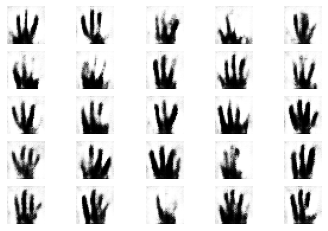

>Saved: generated_plot_0560.png and model_0560.h5
2/2 [==============================] - 0s 10ms/step
>561, dr[0.651,0.378], df[0.715,0.412], g[1.201,0.361]
2/2 [==============================] - 0s 5ms/step
>562, dr[0.796,0.416], df[0.791,0.394], g[1.313,0.341]
2/2 [==============================] - 0s 7ms/step
>563, dr[0.710,0.459], df[0.840,0.369], g[1.256,0.400]
2/2 [==============================] - 0s 4ms/step
>564, dr[0.796,0.397], df[0.716,0.350], g[1.381,0.389]
2/2 [==============================] - 0s 6ms/step
>565, dr[1.002,0.400], df[0.795,0.406], g[1.203,0.391]
2/2 [==============================] - 0s 4ms/step
>566, dr[0.839,0.372], df[0.848,0.369], g[0.948,0.441]
2/2 [==============================] - 0s 5ms/step
>567, dr[0.686,0.412], df[0.810,0.378], g[0.939,0.403]
2/2 [==============================] - 0s 11ms/step
>568, dr[0.826,0.412], df[0.834,0.438], g[0.991,0.398]
2/2 [==============================] - 0s 10ms/step
>569, dr[0.705,0.400], df[0.999,0.403], g[0.997,

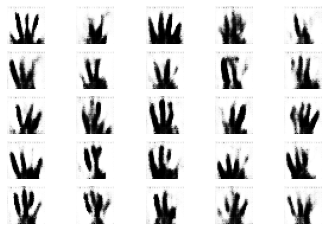

>Saved: generated_plot_0630.png and model_0630.h5
2/2 [==============================] - 0s 6ms/step
>631, dr[0.645,0.419], df[0.776,0.416], g[1.288,0.408]
2/2 [==============================] - 0s 11ms/step
>632, dr[0.885,0.394], df[0.878,0.444], g[1.245,0.422]
2/2 [==============================] - 0s 5ms/step
>633, dr[0.912,0.350], df[0.846,0.366], g[1.055,0.372]
2/2 [==============================] - 0s 8ms/step
>634, dr[0.679,0.328], df[0.832,0.366], g[1.239,0.427]
2/2 [==============================] - 0s 5ms/step
>635, dr[0.912,0.378], df[0.862,0.394], g[1.259,0.411]
2/2 [==============================] - 0s 12ms/step
>636, dr[0.806,0.409], df[0.744,0.422], g[1.250,0.433]
2/2 [==============================] - 0s 12ms/step
>637, dr[0.931,0.394], df[0.890,0.397], g[1.158,0.387]
2/2 [==============================] - 0s 14ms/step
>638, dr[0.669,0.387], df[0.846,0.428], g[1.241,0.392]
2/2 [==============================] - 0s 6ms/step
>639, dr[0.878,0.378], df[0.716,0.416], g[1.167

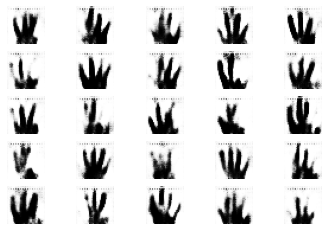

>Saved: generated_plot_0700.png and model_0700.h5
2/2 [==============================] - 0s 5ms/step
>701, dr[0.825,0.397], df[0.709,0.338], g[1.215,0.400]
2/2 [==============================] - 0s 12ms/step
>702, dr[0.655,0.381], df[0.662,0.425], g[1.121,0.369]
2/2 [==============================] - 0s 10ms/step
>703, dr[0.647,0.403], df[0.739,0.409], g[1.285,0.378]
2/2 [==============================] - 0s 5ms/step
>704, dr[0.839,0.412], df[0.701,0.384], g[1.255,0.403]
2/2 [==============================] - 0s 6ms/step
>705, dr[0.678,0.338], df[0.848,0.466], g[1.325,0.412]
2/2 [==============================] - 0s 11ms/step
>706, dr[0.826,0.431], df[0.913,0.400], g[1.276,0.394]
2/2 [==============================] - 0s 12ms/step
>707, dr[0.745,0.463], df[0.760,0.406], g[1.200,0.414]
2/2 [==============================] - 0s 9ms/step
>708, dr[0.595,0.394], df[0.701,0.403], g[1.273,0.386]
2/2 [==============================] - 0s 13ms/step
>709, dr[0.888,0.337], df[0.737,0.431], g[1.23

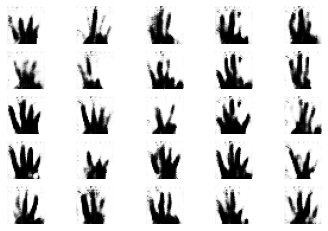

>Saved: generated_plot_0770.png and model_0770.h5
2/2 [==============================] - 0s 6ms/step
>771, dr[0.724,0.394], df[0.695,0.438], g[1.077,0.409]
2/2 [==============================] - 0s 11ms/step
>772, dr[0.621,0.450], df[0.702,0.403], g[1.096,0.391]
2/2 [==============================] - 0s 6ms/step
>773, dr[0.755,0.391], df[0.728,0.372], g[1.023,0.380]
2/2 [==============================] - 0s 13ms/step
>774, dr[0.796,0.366], df[0.924,0.400], g[0.944,0.447]
2/2 [==============================] - 0s 10ms/step
>775, dr[0.811,0.409], df[0.774,0.331], g[1.081,0.419]
2/2 [==============================] - 0s 10ms/step
>776, dr[0.934,0.331], df[0.823,0.456], g[1.088,0.337]
2/2 [==============================] - 0s 10ms/step
>777, dr[0.685,0.375], df[0.748,0.331], g[1.187,0.436]
2/2 [==============================] - 0s 13ms/step
>778, dr[0.952,0.366], df[0.769,0.331], g[1.098,0.414]
2/2 [==============================] - 0s 6ms/step
>779, dr[0.630,0.375], df[0.779,0.397], g[1.1

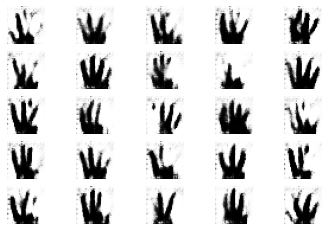

>Saved: generated_plot_0840.png and model_0840.h5
2/2 [==============================] - 0s 12ms/step
>841, dr[0.549,0.406], df[0.655,0.428], g[1.180,0.334]
2/2 [==============================] - 0s 10ms/step
>842, dr[0.934,0.363], df[0.721,0.378], g[1.139,0.389]
2/2 [==============================] - 0s 10ms/step
>843, dr[0.839,0.350], df[0.939,0.372], g[1.456,0.364]
2/2 [==============================] - 0s 10ms/step
>844, dr[0.799,0.416], df[0.656,0.412], g[1.366,0.387]
2/2 [==============================] - 0s 6ms/step
>845, dr[0.893,0.441], df[0.712,0.397], g[1.085,0.403]
2/2 [==============================] - 0s 6ms/step
>846, dr[0.689,0.409], df[0.817,0.412], g[1.028,0.387]
2/2 [==============================] - 0s 6ms/step
>847, dr[0.610,0.425], df[0.740,0.409], g[1.174,0.412]
2/2 [==============================] - 0s 6ms/step
>848, dr[0.732,0.331], df[0.594,0.337], g[1.217,0.427]
2/2 [==============================] - 0s 5ms/step
>849, dr[0.733,0.422], df[0.707,0.363], g[1.152

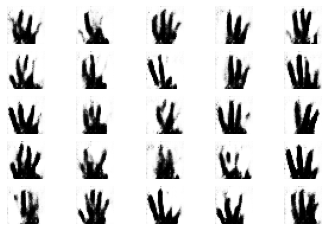

>Saved: generated_plot_0910.png and model_0910.h5
2/2 [==============================] - 0s 6ms/step
>911, dr[0.663,0.400], df[0.701,0.391], g[1.180,0.366]
2/2 [==============================] - 0s 12ms/step
>912, dr[0.730,0.403], df[0.687,0.422], g[1.185,0.392]
2/2 [==============================] - 0s 5ms/step
>913, dr[0.705,0.406], df[0.793,0.359], g[1.143,0.420]
2/2 [==============================] - 0s 5ms/step
>914, dr[0.731,0.372], df[0.682,0.419], g[1.122,0.417]
2/2 [==============================] - 0s 9ms/step
>915, dr[0.743,0.437], df[0.854,0.422], g[1.086,0.375]
2/2 [==============================] - 0s 13ms/step
>916, dr[0.702,0.381], df[0.667,0.419], g[1.082,0.408]
2/2 [==============================] - 0s 13ms/step
>917, dr[0.760,0.409], df[0.725,0.403], g[1.049,0.439]
2/2 [==============================] - 0s 12ms/step
>918, dr[0.668,0.403], df[0.859,0.381], g[1.060,0.366]
2/2 [==============================] - 0s 6ms/step
>919, dr[0.784,0.319], df[0.765,0.419], g[1.085

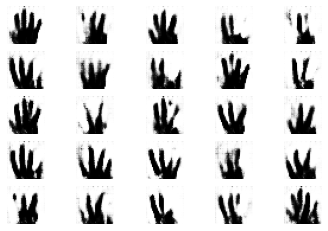

>Saved: generated_plot_0980.png and model_0980.h5
2/2 [==============================] - 0s 13ms/step
>981, dr[0.676,0.391], df[0.652,0.381], g[1.206,0.375]
2/2 [==============================] - 0s 6ms/step
>982, dr[0.673,0.350], df[0.607,0.369], g[1.311,0.406]
2/2 [==============================] - 0s 6ms/step
>983, dr[0.680,0.416], df[0.713,0.391], g[1.170,0.377]
2/2 [==============================] - 0s 5ms/step
>984, dr[0.739,0.397], df[0.855,0.366], g[1.042,0.409]
2/2 [==============================] - 0s 6ms/step
>985, dr[0.628,0.422], df[0.614,0.400], g[1.103,0.380]
2/2 [==============================] - 0s 8ms/step
>986, dr[0.683,0.378], df[0.630,0.412], g[1.066,0.367]
2/2 [==============================] - 0s 13ms/step
>987, dr[0.572,0.406], df[0.795,0.341], g[1.048,0.417]
2/2 [==============================] - 0s 7ms/step
>988, dr[0.637,0.391], df[0.791,0.425], g[1.149,0.372]
2/2 [==============================] - 0s 8ms/step
>989, dr[0.637,0.441], df[0.653,0.391], g[1.158,0

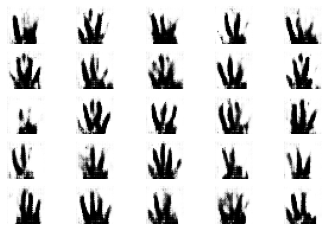

>Saved: generated_plot_1050.png and model_1050.h5
2/2 [==============================] - 0s 15ms/step
>1051, dr[0.665,0.400], df[0.690,0.406], g[1.084,0.419]
2/2 [==============================] - 0s 12ms/step
>1052, dr[0.664,0.431], df[0.719,0.438], g[1.063,0.408]
2/2 [==============================] - 0s 8ms/step
>1053, dr[0.668,0.406], df[0.936,0.406], g[1.161,0.405]
2/2 [==============================] - 0s 5ms/step
>1054, dr[0.633,0.425], df[0.687,0.347], g[1.148,0.402]
2/2 [==============================] - 0s 6ms/step
>1055, dr[0.635,0.431], df[0.515,0.397], g[1.099,0.345]
2/2 [==============================] - 0s 10ms/step
>1056, dr[0.756,0.406], df[0.698,0.378], g[1.134,0.392]
2/2 [==============================] - 0s 5ms/step
>1057, dr[0.745,0.434], df[0.757,0.409], g[1.059,0.391]
2/2 [==============================] - 0s 7ms/step
>1058, dr[0.608,0.472], df[0.788,0.381], g[1.023,0.392]
2/2 [==============================] - 0s 10ms/step
>1059, dr[0.761,0.369], df[0.720,0.384]

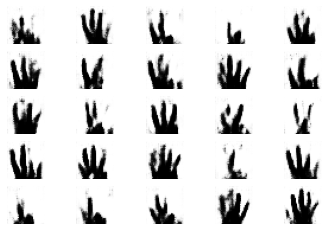

>Saved: generated_plot_1120.png and model_1120.h5
2/2 [==============================] - 0s 6ms/step
>1121, dr[0.605,0.425], df[0.680,0.403], g[1.026,0.394]
2/2 [==============================] - 0s 5ms/step
>1122, dr[0.680,0.403], df[0.811,0.438], g[1.166,0.442]
2/2 [==============================] - 0s 6ms/step
>1123, dr[0.606,0.369], df[0.597,0.416], g[1.158,0.389]
2/2 [==============================] - 0s 6ms/step
>1124, dr[0.839,0.306], df[0.776,0.456], g[1.086,0.352]
2/2 [==============================] - 0s 6ms/step
>1125, dr[0.674,0.381], df[0.655,0.422], g[1.165,0.416]
2/2 [==============================] - 0s 11ms/step
>1126, dr[0.533,0.378], df[0.615,0.319], g[1.304,0.419]
2/2 [==============================] - 0s 6ms/step
>1127, dr[0.740,0.406], df[0.564,0.434], g[1.209,0.420]
2/2 [==============================] - 0s 8ms/step
>1128, dr[0.494,0.384], df[0.671,0.384], g[1.249,0.386]
2/2 [==============================] - 0s 5ms/step
>1129, dr[0.689,0.325], df[0.666,0.403], g

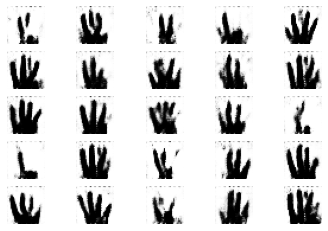

>Saved: generated_plot_1190.png and model_1190.h5
2/2 [==============================] - 0s 11ms/step
>1191, dr[0.541,0.406], df[0.477,0.463], g[1.243,0.400]
2/2 [==============================] - 0s 8ms/step
>1192, dr[0.714,0.359], df[0.691,0.412], g[1.202,0.419]
2/2 [==============================] - 0s 6ms/step
>1193, dr[0.579,0.500], df[0.652,0.391], g[1.349,0.366]
2/2 [==============================] - 0s 5ms/step
>1194, dr[0.617,0.416], df[0.710,0.381], g[1.212,0.417]
2/2 [==============================] - 0s 6ms/step
>1195, dr[0.634,0.397], df[0.698,0.394], g[1.325,0.433]
2/2 [==============================] - 0s 4ms/step
>1196, dr[0.639,0.381], df[0.605,0.363], g[1.099,0.400]
2/2 [==============================] - 0s 11ms/step
>1197, dr[0.594,0.472], df[0.613,0.375], g[1.242,0.366]
2/2 [==============================] - 0s 6ms/step
>1198, dr[0.690,0.347], df[0.750,0.334], g[1.229,0.406]
2/2 [==============================] - 0s 10ms/step
>1199, dr[0.629,0.425], df[0.581,0.447],

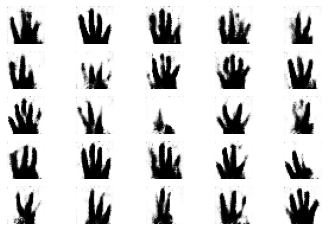

>Saved: generated_plot_1260.png and model_1260.h5
2/2 [==============================] - 0s 12ms/step
>1261, dr[0.717,0.356], df[0.601,0.491], g[1.093,0.384]
2/2 [==============================] - 0s 8ms/step
>1262, dr[0.599,0.416], df[0.638,0.359], g[1.071,0.402]
2/2 [==============================] - 0s 10ms/step
>1263, dr[0.560,0.350], df[0.681,0.369], g[1.123,0.403]
2/2 [==============================] - 0s 11ms/step
>1264, dr[0.665,0.353], df[0.613,0.356], g[1.122,0.434]
2/2 [==============================] - 0s 6ms/step
>1265, dr[0.594,0.400], df[0.723,0.419], g[1.159,0.461]
2/2 [==============================] - 0s 8ms/step
>1266, dr[0.796,0.422], df[0.637,0.350], g[1.227,0.444]
2/2 [==============================] - 0s 16ms/step
>1267, dr[0.617,0.403], df[0.700,0.325], g[1.117,0.403]
2/2 [==============================] - 0s 14ms/step
>1268, dr[0.646,0.322], df[0.765,0.353], g[1.112,0.389]
2/2 [==============================] - 0s 14ms/step
>1269, dr[0.671,0.378], df[0.589,0.38

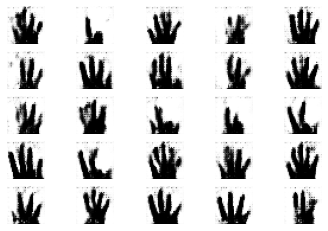

>Saved: generated_plot_1330.png and model_1330.h5
2/2 [==============================] - 0s 11ms/step
>1331, dr[0.530,0.372], df[0.764,0.416], g[1.176,0.411]
2/2 [==============================] - 0s 12ms/step
>1332, dr[0.607,0.441], df[0.657,0.375], g[1.055,0.411]
2/2 [==============================] - 0s 7ms/step
>1333, dr[0.558,0.419], df[0.749,0.403], g[1.383,0.389]
2/2 [==============================] - 0s 6ms/step
>1334, dr[0.681,0.384], df[0.651,0.409], g[1.174,0.384]
2/2 [==============================] - 0s 14ms/step
>1335, dr[0.539,0.363], df[0.657,0.353], g[1.212,0.386]
2/2 [==============================] - 0s 4ms/step
>1336, dr[0.668,0.384], df[0.559,0.362], g[1.277,0.383]
2/2 [==============================] - 0s 13ms/step
>1337, dr[0.747,0.419], df[0.643,0.387], g[1.153,0.386]
2/2 [==============================] - 0s 13ms/step
>1338, dr[0.545,0.428], df[0.654,0.419], g[1.153,0.419]
2/2 [==============================] - 0s 8ms/step
>1339, dr[0.681,0.400], df[0.654,0.350

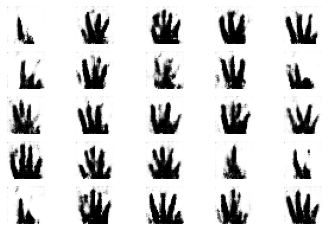

>Saved: generated_plot_1400.png and model_1400.h5


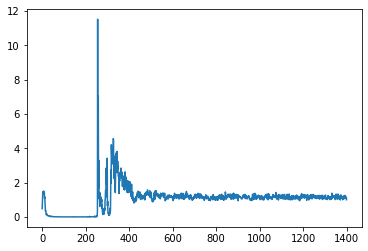

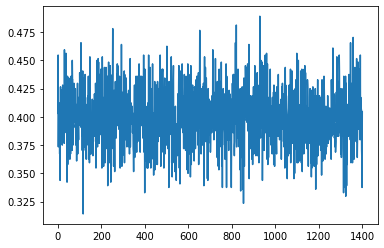

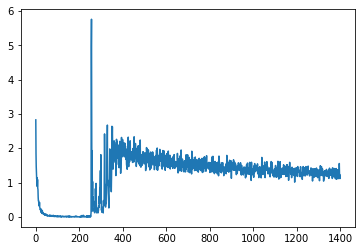

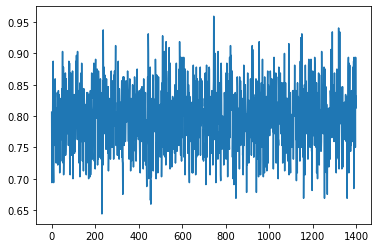

In [ ]:
latent_dim = 100

discriminator = discriminator_model_Wes()
generator = generator_model(latent_dim)
gan_model = define_wgan(generator, discriminator)

gen_acc, dis_acc = train(generator, discriminator, gan_model, images,labels, latent_dim,n_epochs=200)